# Lab 3: Contextual Bandit-Based News Article Recommendation

**Course:** Reinforcement Learning Fundamentals  
**Student Name:** [Your Name]  
**Roll Number:** [Your Roll Number]  
**GitHub Branch:** firstname_U20230xxx  

# Imports and Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


# Section 5.1: Data Pre-processing (10 Points)

This section covers:
1. Loading datasets
2. Data exploration
3. Data cleaning (handling missing values)
4. Feature encoding
5. Feature scaling

## 5.1.1: Load Datasets

In [6]:
# Load news articles dataset
news_articles = pd.read_csv('./data/news_articles.csv')
print(f"✓ News articles loaded: {news_articles.shape[0]} rows, {news_articles.shape[1]} columns")

# Load user datasets
train_users = pd.read_csv('./data/train_users.csv')
test_users = pd.read_csv('./data/test_users.csv')
print(f"✓ Training users loaded: {train_users.shape[0]} rows, {train_users.shape[1]} columns")
print(f"✓ Test users loaded: {test_users.shape[0]} rows, {test_users.shape[1]} columns")

✓ News articles loaded: 209527 rows, 6 columns
✓ Training users loaded: 2000 rows, 6 columns
✓ Test users loaded: 2000 rows, 6 columns


## 5.1.2: Data Exploration

In [7]:
print("=" * 80)
print("NEWS ARTICLES DATASET")
print("=" * 80)
print("\nFirst 5 rows:")
display(news_articles.head())

print("\nDataset Info:")
print(news_articles.info())

print("\nNews Categories Distribution:")
print(news_articles['category'].value_counts())

print("\nMissing Values:")
print(news_articles.isnull().sum())

NEWS ARTICLES DATASET

First 5 rows:


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22



Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   link               209527 non-null  str  
 1   headline           209521 non-null  str  
 2   category           209527 non-null  str  
 3   short_description  189815 non-null  str  
 4   authors            172109 non-null  str  
 5   date               209527 non-null  str  
dtypes: str(6)
memory usage: 9.6 MB
None

News Categories Distribution:
category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              35

In [8]:
print("=" * 80)
print("TRAINING USERS DATASET")
print("=" * 80)
print("\nFirst 5 rows:")
display(train_users.head())

print("\nDataset Info:")
print(train_users.info())

print("\nUser Categories Distribution:")
print(train_users.iloc[:, -1].value_counts())

print("\nMissing Values:")
print(train_users.isnull().sum())

TRAINING USERS DATASET

First 5 rows:


,user_id,age,income,clicks,purchase_amount,label
0,1,28,58242,81,378.38,user3
1,2,28,38225,21,114.50,user3
2,3,39,95017,41,66.24,user2
3,4,52,33473,98,496.88,user3
4,5,29,80690,5,293.24,user1



Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2000 non-null   int64  
 1   age              2000 non-null   int64  
 2   income           2000 non-null   int64  
 3   clicks           2000 non-null   int64  
 4   purchase_amount  2000 non-null   float64
 5   label            2000 non-null   str    
dtypes: float64(1), int64(4), str(1)
memory usage: 93.9 KB
None

User Categories Distribution:
label
user1    687
user2    669
user3    644
Name: count, dtype: int64

Missing Values:
user_id            0
age                0
income             0
clicks             0
purchase_amount    0
label              0
dtype: int64


In [9]:
print("=" * 80)
print("TEST USERS DATASET")
print("=" * 80)
print("\nFirst 5 rows:")
display(test_users.head())

print("\nDataset Info:")
print(test_users.info())

print("\nUser Categories Distribution:")
print(test_users.iloc[:, -1].value_counts())

print("\nMissing Values:")
print(test_users.isnull().sum())

TEST USERS DATASET

First 5 rows:


,user_id,age,income,clicks,purchase_amount,label
0,1,29,29862,91,270.91,user2
1,2,22,30084,20,498.66,user2
2,3,29,55409,57,356.15,user2
3,4,39,48149,59,31.70,user3
4,5,44,29959,59,310.33,user3



Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2000 non-null   int64  
 1   age              2000 non-null   int64  
 2   income           2000 non-null   int64  
 3   clicks           2000 non-null   int64  
 4   purchase_amount  2000 non-null   float64
 5   label            2000 non-null   str    
dtypes: float64(1), int64(4), str(1)
memory usage: 93.9 KB
None

User Categories Distribution:
label
user2    679
user1    672
user3    649
Name: count, dtype: int64

Missing Values:
user_id            0
age                0
income             0
clicks             0
purchase_amount    0
label              0
dtype: int64


## 5.1.3: Data Cleaning

In [10]:
print("Handling missing values...\n")

# Handle missing values in news articles
print(f"Missing values in news_articles before cleaning: {news_articles.isnull().sum().sum()}")
if news_articles.isnull().sum().sum() > 0:
    # Fill numerical columns with median
    numerical_cols = news_articles.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        news_articles[col].fillna(news_articles[col].median(), inplace=True)
    
    # Fill categorical columns with mode
    categorical_cols = news_articles.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        news_articles[col].fillna(news_articles[col].mode()[0], inplace=True)
    
    print(f"✓ Missing values handled in news_articles")
else:
    print(f"✓ No missing values in news_articles")

# Handle missing values in training users
print(f"\nMissing values in train_users before cleaning: {train_users.isnull().sum().sum()}")
if train_users.isnull().sum().sum() > 0:
    # Fill numerical columns with median
    numerical_cols = train_users.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        train_users[col].fillna(train_users[col].median(), inplace=True)
    
    # Fill categorical columns with mode
    categorical_cols = train_users.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col in train_users.columns and not train_users[col].mode().empty:
            train_users[col].fillna(train_users[col].mode()[0], inplace=True)
    
    print(f"✓ Missing values handled in train_users")
else:
    print(f"✓ No missing values in train_users")

# Handle missing values in test users
print(f"\nMissing values in test_users before cleaning: {test_users.isnull().sum().sum()}")
if test_users.isnull().sum().sum() > 0:
    # Fill numerical columns with median
    numerical_cols = test_users.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        test_users[col].fillna(test_users[col].median(), inplace=True)
    
    # Fill categorical columns with mode
    categorical_cols = test_users.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col in test_users.columns and not test_users[col].mode().empty:
            test_users[col].fillna(test_users[col].mode()[0], inplace=True)
    
    print(f"✓ Missing values handled in test_users")
else:
    print(f"✓ No missing values in test_users")

print("\n✓ Data cleaning completed!")

Handling missing values...

Missing values in news_articles before cleaning: 57136
✓ Missing values handled in news_articles

Missing values in train_users before cleaning: 0
✓ No missing values in train_users

Missing values in test_users before cleaning: 0
✓ No missing values in test_users

✓ Data cleaning completed!


## 5.1.4: Feature Encoding

In [11]:
# Encode news categories (Arms of the bandit)
if 'category' in news_articles.columns:
    # Standardize the categories
    news_articles['category'] = news_articles['category'].str.strip().str.title()
    
    # Create label encoder for news categories
    news_category_encoder = LabelEncoder()
    news_articles['category_encoded'] = news_category_encoder.fit_transform(news_articles['category'])
    print(f"✓ News categories encoded: {list(news_category_encoder.classes_)}")
    print(f"  Encoding: {dict(zip(news_category_encoder.classes_, news_category_encoder.transform(news_category_encoder.classes_)))}")

✓ News categories encoded: ['Arts', 'Arts & Culture', 'Black Voices', 'Business', 'College', 'Comedy', 'Crime', 'Culture & Arts', 'Divorce', 'Education', 'Entertainment', 'Environment', 'Fifty', 'Food & Drink', 'Good News', 'Green', 'Healthy Living', 'Home & Living', 'Impact', 'Latino Voices', 'Media', 'Money', 'Parenting', 'Parents', 'Politics', 'Queer Voices', 'Religion', 'Science', 'Sports', 'Style', 'Style & Beauty', 'Taste', 'Tech', 'The Worldpost', 'Travel', 'U.S. News', 'Weddings', 'Weird News', 'Wellness', 'Women', 'World News', 'Worldpost']
  Encoding: {'Arts': np.int64(0), 'Arts & Culture': np.int64(1), 'Black Voices': np.int64(2), 'Business': np.int64(3), 'College': np.int64(4), 'Comedy': np.int64(5), 'Crime': np.int64(6), 'Culture & Arts': np.int64(7), 'Divorce': np.int64(8), 'Education': np.int64(9), 'Entertainment': np.int64(10), 'Environment': np.int64(11), 'Fifty': np.int64(12), 'Food & Drink': np.int64(13), 'Good News': np.int64(14), 'Green': np.int64(15), 'Healthy Liv

In [12]:
# Separate features and labels for training data
X_train = train_users.iloc[:, :-1]  # All columns except last
y_train = train_users.iloc[:, -1]   # Last column (User1, User2, User3)

# Separate features and labels for test data
X_test = test_users.iloc[:, :-1]
y_test = test_users.iloc[:, -1]

print(f"Training features shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training features shape: (2000, 5)
Training labels shape: (2000,)
Test features shape: (2000, 5)
Test labels shape: (2000,)


In [13]:
# Encode categorical features in user data
categorical_features = X_train.select_dtypes(include=['object']).columns
print(f"Categorical features in user data: {list(categorical_features)}")

for col in categorical_features:
    le = LabelEncoder()
    # Fit on combined data to ensure same encoding
    combined = pd.concat([X_train[col], X_test[col]], axis=0)
    le.fit(combined)
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    print(f"  ✓ Encoded feature: {col}")

# Encode user labels (User1, User2, User3 -> 0, 1, 2)
user_label_encoder = LabelEncoder()
y_train_encoded = user_label_encoder.fit_transform(y_train)
y_test_encoded = user_label_encoder.transform(y_test)
print(f"\n✓ User categories encoded: {list(user_label_encoder.classes_)}")
print(f"  Encoding: {dict(zip(user_label_encoder.classes_, user_label_encoder.transform(user_label_encoder.classes_)))}")

Categorical features in user data: []

✓ User categories encoded: ['user1', 'user2', 'user3']
  Encoding: {'user1': np.int64(0), 'user2': np.int64(1), 'user3': np.int64(2)}


## 5.1.5: Feature Scaling

In [14]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✓ Features scaled using StandardScaler")
print(f"  Training set shape: {X_train_scaled.shape}")
print(f"  Test set shape: {X_test_scaled.shape}")
print(f"\n✓ Data pre-processing completed successfully!")

✓ Features scaled using StandardScaler
  Training set shape: (2000, 5)
  Test set shape: (2000, 5)

✓ Data pre-processing completed successfully!


## Summary of Section 5.1

In [15]:
print("=" * 80)
print("DATA PRE-PROCESSING SUMMARY")
print("=" * 80)
print(f"✓ News articles cleaned and encoded: {news_articles.shape}")
print(f"  - Categories: {list(news_category_encoder.classes_)}")
print(f"\n✓ Training users prepared: {X_train_scaled.shape}")
print(f"✓ Test users prepared: {X_test_scaled.shape}")
print(f"  - User categories: {list(user_label_encoder.classes_)}")
print(f"\n✓ All features encoded and scaled")
print(f"✓ Ready for user classification training")
print("=" * 80)

DATA PRE-PROCESSING SUMMARY
✓ News articles cleaned and encoded: (209527, 7)
  - Categories: ['Arts', 'Arts & Culture', 'Black Voices', 'Business', 'College', 'Comedy', 'Crime', 'Culture & Arts', 'Divorce', 'Education', 'Entertainment', 'Environment', 'Fifty', 'Food & Drink', 'Good News', 'Green', 'Healthy Living', 'Home & Living', 'Impact', 'Latino Voices', 'Media', 'Money', 'Parenting', 'Parents', 'Politics', 'Queer Voices', 'Religion', 'Science', 'Sports', 'Style', 'Style & Beauty', 'Taste', 'Tech', 'The Worldpost', 'Travel', 'U.S. News', 'Weddings', 'Weird News', 'Wellness', 'Women', 'World News', 'Worldpost']

✓ Training users prepared: (2000, 5)
✓ Test users prepared: (2000, 5)
  - User categories: ['user1', 'user2', 'user3']

✓ All features encoded and scaled
✓ Ready for user classification training


# Section 5.2: User Classification (10 Points)

This section covers:
1. Training baseline classification models
2. Hyperparameter tuning
3. Model selection and ensemble creation
4. Detailed evaluation
5. Context detector function

## 5.2.1: Baseline Models

Training baseline classification models...

Model 1: Decision Tree Classifier
  Accuracy: 0.3335 (33.35%)

Model 2: Logistic Regression
  Accuracy: 0.3265 (32.65%)

Model 3: Random Forest Classifier
  Accuracy: 0.3240 (32.40%)

Model 4: Support Vector Machine
  Accuracy: 0.3285 (32.85%)



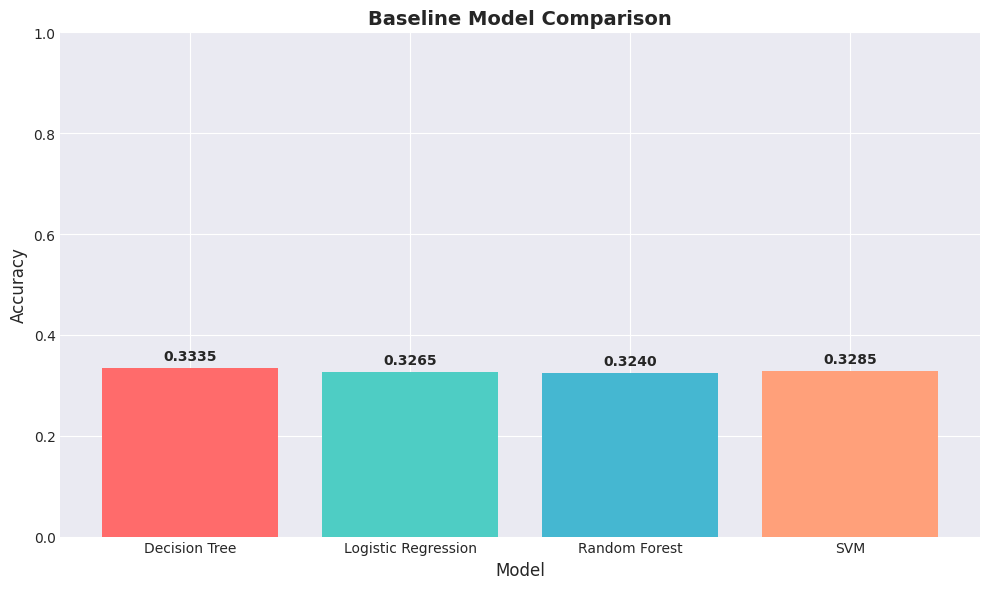

✓ Baseline comparison plot saved


In [16]:
print("Training baseline classification models...\n")

# Store results
baseline_results = {}

# Model 1: Decision Tree Classifier
print("Model 1: Decision Tree Classifier")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train_encoded)
dt_pred = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test_encoded, dt_pred)
baseline_results['Decision Tree'] = dt_accuracy
print(f"  Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)\n")

# Model 2: Logistic Regression
print("Model 2: Logistic Regression")
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train_scaled, y_train_encoded)
lr_pred = lr_classifier.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test_encoded, lr_pred)
baseline_results['Logistic Regression'] = lr_accuracy
print(f"  Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)\n")

# Model 3: Random Forest Classifier
print("Model 3: Random Forest Classifier")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train_encoded)
rf_pred = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test_encoded, rf_pred)
baseline_results['Random Forest'] = rf_accuracy
print(f"  Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)\n")

# Model 4: Support Vector Machine
print("Model 4: Support Vector Machine")
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_scaled, y_train_encoded)
svm_pred = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test_encoded, svm_pred)
baseline_results['SVM'] = svm_accuracy
print(f"  Accuracy: {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)\n")

# Visualize baseline results
plt.figure(figsize=(10, 6))
models = list(baseline_results.keys())
accuracies = list(baseline_results.values())
bars = plt.bar(models, accuracies, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('Baseline Model Comparison', fontsize=14, fontweight='bold')
plt.ylim([0, 1.0])
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{accuracies[i]:.4f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.savefig('baseline_models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Baseline comparison plot saved")

## 5.2.2: Hyperparameter Tuning

In [17]:
print("Hyperparameter tuning using GridSearchCV...\n")

# Tuning Decision Tree
print("Tuning Decision Tree...")
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, 
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
dt_grid.fit(X_train_scaled, y_train_encoded)
dt_best = dt_grid.best_estimator_
dt_best_accuracy = accuracy_score(y_test_encoded, dt_best.predict(X_test_scaled))
print(f"  Best params: {dt_grid.best_params_}")
print(f"  Best CV score: {dt_grid.best_score_:.4f}")
print(f"  Test accuracy: {dt_best_accuracy:.4f}\n")

Hyperparameter tuning using GridSearchCV...

Tuning Decision Tree...
Fitting 5 folds for each of 90 candidates, totalling 450 fits
  Best params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
  Best CV score: 0.3490
  Test accuracy: 0.3335



In [18]:
# Tuning Logistic Regression
print("Tuning Logistic Regression...")
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_params, 
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_scaled, y_train_encoded)
lr_best = lr_grid.best_estimator_
lr_best_accuracy = accuracy_score(y_test_encoded, lr_best.predict(X_test_scaled))
print(f"  Best params: {lr_grid.best_params_}")
print(f"  Best CV score: {lr_grid.best_score_:.4f}")
print(f"  Test accuracy: {lr_best_accuracy:.4f}\n")

Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
  Best params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
  Best CV score: 0.3375
  Test accuracy: 0.3285



In [19]:
# Tuning Random Forest
print("Tuning Random Forest...")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, 
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train_encoded)
rf_best = rf_grid.best_estimator_
rf_best_accuracy = accuracy_score(y_test_encoded, rf_best.predict(X_test_scaled))
print(f"  Best params: {rf_grid.best_params_}")
print(f"  Best CV score: {rf_grid.best_score_:.4f}")
print(f"  Test accuracy: {rf_best_accuracy:.4f}\n")

Tuning Random Forest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
  Best params: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
  Best CV score: 0.3475
  Test accuracy: 0.3140



In [20]:
# Tuning SVM
print("Tuning SVM...")
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, 
                        cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
svm_grid.fit(X_train_scaled, y_train_encoded)
svm_best = svm_grid.best_estimator_
svm_best_accuracy = accuracy_score(y_test_encoded, svm_best.predict(X_test_scaled))
print(f"  Best params: {svm_grid.best_params_}")
print(f"  Best CV score: {svm_grid.best_score_:.4f}")
print(f"  Test accuracy: {svm_best_accuracy:.4f}\n")

Tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
  Best params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
  Best CV score: 0.3500
  Test accuracy: 0.3330



## 5.2.3: Model Comparison and Ensemble

In [21]:
# Compare all tuned models
models_comparison = {
    'Decision Tree (Tuned)': dt_best_accuracy,
    'Logistic Regression (Tuned)': lr_best_accuracy,
    'Random Forest (Tuned)': rf_best_accuracy,
    'SVM (Tuned)': svm_best_accuracy
}

print("=" * 80)
print("TUNED MODEL COMPARISON")
print("=" * 80)
for model_name, acc in sorted(models_comparison.items(), key=lambda x: x[1], reverse=True):
    print(f"  {model_name}: {acc:.4f} ({acc*100:.2f}%)")
print("=" * 80)

TUNED MODEL COMPARISON
  Decision Tree (Tuned): 0.3335 (33.35%)
  SVM (Tuned): 0.3330 (33.30%)
  Logistic Regression (Tuned): 0.3285 (32.85%)
  Random Forest (Tuned): 0.3140 (31.40%)


In [22]:
# Create ensemble voting classifier
print("\nCreating ensemble voting classifier...")
ensemble_classifier = VotingClassifier(
    estimators=[
        ('dt', dt_best),
        ('lr', lr_best),
        ('rf', rf_best),
        ('svm', svm_best)
    ],
    voting='hard'
)
ensemble_classifier.fit(X_train_scaled, y_train_encoded)
ensemble_pred = ensemble_classifier.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test_encoded, ensemble_pred)
print(f"  Ensemble accuracy: {ensemble_accuracy:.4f} ({ensemble_accuracy*100:.2f}%)")

# Select the best performing model
best_model_name = max(models_comparison, key=models_comparison.get)
best_model_accuracy = max(models_comparison.values())

if ensemble_accuracy > best_model_accuracy:
    final_classifier = ensemble_classifier
    final_accuracy = ensemble_accuracy
    final_model_name = "Ensemble Voting Classifier"
else:
    if best_model_name == 'Decision Tree (Tuned)':
        final_classifier = dt_best
    elif best_model_name == 'Logistic Regression (Tuned)':
        final_classifier = lr_best
    elif best_model_name == 'Random Forest (Tuned)':
        final_classifier = rf_best
    else:
        final_classifier = svm_best
    final_accuracy = best_model_accuracy
    final_model_name = best_model_name

print(f"\n✓ Final selected model: {final_model_name}")
print(f"✓ Final test accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")


Creating ensemble voting classifier...
  Ensemble accuracy: 0.3220 (32.20%)

✓ Final selected model: Decision Tree (Tuned)
✓ Final test accuracy: 0.3335 (33.35%)


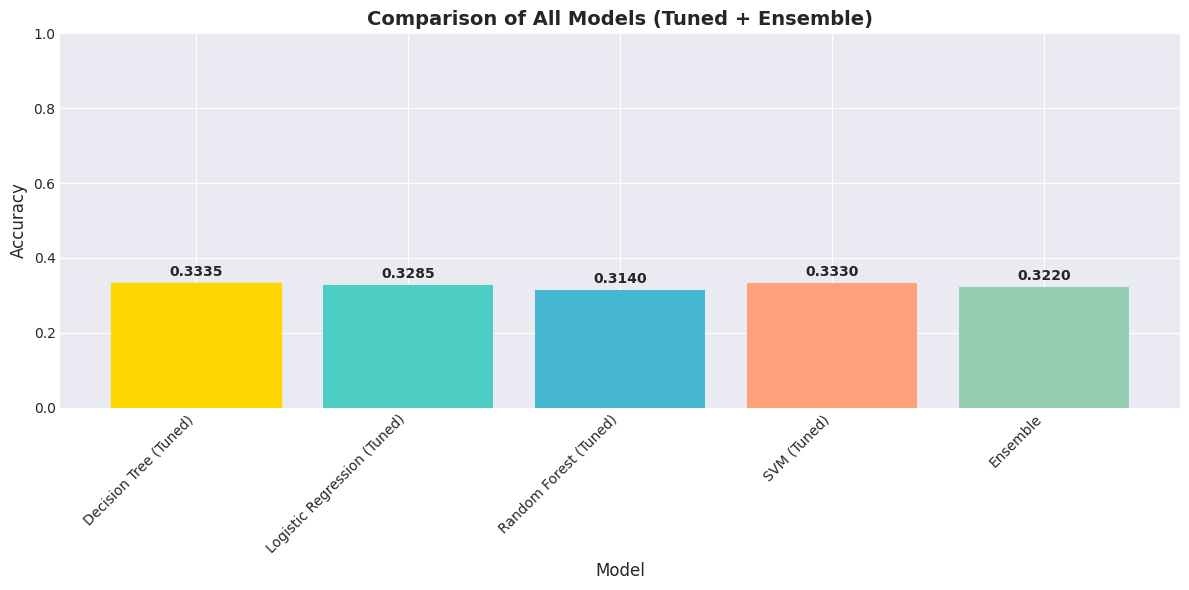

✓ All models comparison plot saved


In [23]:
# Visualize comparison of all models including ensemble
all_models_comparison = models_comparison.copy()
all_models_comparison['Ensemble'] = ensemble_accuracy

plt.figure(figsize=(12, 6))
models = list(all_models_comparison.keys())
accuracies = list(all_models_comparison.values())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#96CEB4']
bars = plt.bar(models, accuracies, color=colors[:len(models)])

# Highlight the best model
best_idx = accuracies.index(max(accuracies))
bars[best_idx].set_color('#FFD700')  # Gold color for best model

plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('Comparison of All Models (Tuned + Ensemble)', fontsize=14, fontweight='bold')
plt.ylim([0, 1.0])
plt.xticks(rotation=45, ha='right')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{accuracies[i]:.4f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.savefig('all_models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ All models comparison plot saved")

## 5.2.4: Detailed Evaluation

In [24]:
final_pred = final_classifier.predict(X_test_scaled)

print("=" * 80)
print("CLASSIFICATION REPORT")
print("=" * 80)
print(classification_report(y_test_encoded, final_pred, 
                          target_names=user_label_encoder.classes_))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_encoded, final_pred)
print(cm)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

       user1       0.33      0.26      0.29       672
       user2       0.35      0.39      0.37       679
       user3       0.32      0.36      0.34       649

    accuracy                           0.33      2000
   macro avg       0.33      0.33      0.33      2000
weighted avg       0.33      0.33      0.33      2000


Confusion Matrix:
[[172 256 244]
 [165 262 252]
 [179 237 233]]


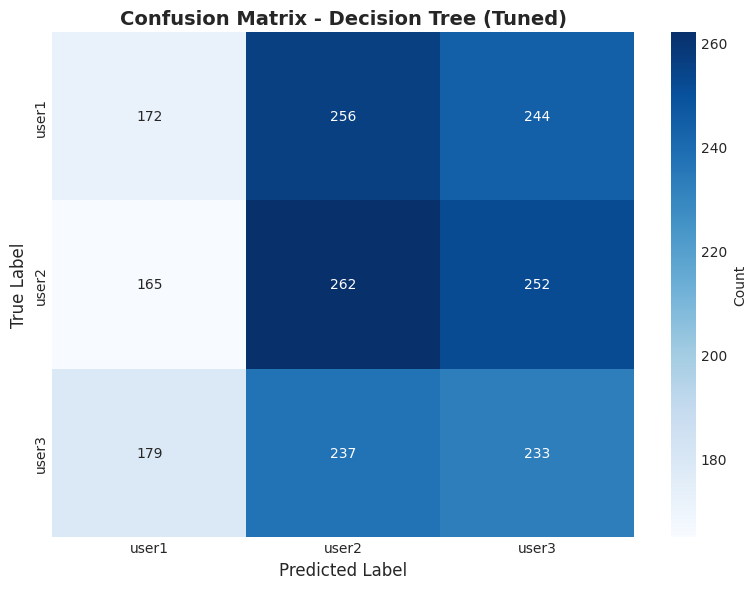

✓ Confusion matrix plot saved


In [25]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=user_label_encoder.classes_,
            yticklabels=user_label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {final_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix_user_classifier.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Confusion matrix plot saved")

## 5.2.5: Context Detector Function

In [26]:
def predict_user_context(user_features):
    """
    Predict the user category (context) for a given user.
    
    Parameters:
    -----------
    user_features : array-like
        User features (should match the training data format)
    
    Returns:
    --------
    context : str
        Predicted user category (User1, User2, or User3)
    context_encoded : int
        Encoded user category (0, 1, or 2)
    """
    # Ensure input is 2D array
    if len(user_features.shape) == 1:
        user_features = user_features.reshape(1, -1)
    
    # Scale features
    user_features_scaled = scaler.transform(user_features)
    
    # Predict
    context_encoded = final_classifier.predict(user_features_scaled)[0]
    context = user_label_encoder.inverse_transform([context_encoded])[0]
    
    return context, context_encoded

print("✓ Context detector function created")

✓ Context detector function created


In [27]:
# Test the context detector
print("Testing context detector on sample test users:\n")
correct_predictions = 0
total_samples = min(10, len(X_test_scaled))

for i in range(total_samples):
    predicted_context, predicted_encoded = predict_user_context(X_test_scaled[i])
    actual_context = user_label_encoder.inverse_transform([y_test_encoded[i]])[0]
    match = "✓" if predicted_context == actual_context else "✗"
    if predicted_context == actual_context:
        correct_predictions += 1
    print(f"  Sample {i+1}: Predicted={predicted_context}, Actual={actual_context} {match}")

print(f"\nTest accuracy on samples: {correct_predictions}/{total_samples} ({correct_predictions/total_samples*100:.2f}%)")

Testing context detector on sample test users:

  Sample 1: Predicted=user3, Actual=user2 ✗
  Sample 2: Predicted=user3, Actual=user2 ✗
  Sample 3: Predicted=user3, Actual=user2 ✗
  Sample 4: Predicted=user3, Actual=user3 ✓
  Sample 5: Predicted=user3, Actual=user3 ✓
  Sample 6: Predicted=user3, Actual=user2 ✗
  Sample 7: Predicted=user3, Actual=user3 ✓
  Sample 8: Predicted=user3, Actual=user2 ✗
  Sample 9: Predicted=user3, Actual=user3 ✓
  Sample 10: Predicted=user3, Actual=user1 ✗

Test accuracy on samples: 4/10 (40.00%)


## Save Model Artifacts

In [28]:
import pickle

# Create a dictionary with all necessary components
model_artifacts = {
    'classifier': final_classifier,
    'scaler': scaler,
    'user_label_encoder': user_label_encoder,
    'news_category_encoder': news_category_encoder,
    'feature_columns': list(X_train.columns),
    'model_name': final_model_name,
    'accuracy': final_accuracy
}

# Save to file
with open('user_classifier_artifacts.pkl', 'wb') as f:
    pickle.dump(model_artifacts, f)

print("✓ Model artifacts saved to 'user_classifier_artifacts.pkl'")
print("  This file contains the trained classifier, scaler, and encoders for later use.")

✓ Model artifacts saved to 'user_classifier_artifacts.pkl'
  This file contains the trained classifier, scaler, and encoders for later use.


## Summary of Section 5.2

In [29]:
print("=" * 80)
print("USER CLASSIFICATION SUMMARY")
print("=" * 80)
print(f"✓ Trained and evaluated 4 baseline classifiers")
print(f"✓ Performed hyperparameter tuning using GridSearchCV (5-fold CV)")
print(f"✓ Created ensemble voting classifier")
print(f"\n✓ Final model: {final_model_name}")
print(f"✓ Final test accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"\n✓ Context detector function ready")
print(f"✓ Model artifacts saved for later use")
print(f"\n✓ Ready to proceed to Section 5.3: Contextual Bandit Algorithms")
print("=" * 80)

USER CLASSIFICATION SUMMARY
✓ Trained and evaluated 4 baseline classifiers
✓ Performed hyperparameter tuning using GridSearchCV (5-fold CV)
✓ Created ensemble voting classifier

✓ Final model: Decision Tree (Tuned)
✓ Final test accuracy: 0.3335 (33.35%)

✓ Context detector function ready
✓ Model artifacts saved for later use

✓ Ready to proceed to Section 5.3: Contextual Bandit Algorithms


---
**End of Sections 5.1 and 5.2**

Next steps:
- Section 5.3: Implement Contextual Bandit Algorithms (Epsilon-Greedy, UCB, SoftMax)
- Section 5.4: Build Recommendation Engine
- Section 5.5: Evaluation & Reporting